Zaimportowanie potrzebnych bibliotek

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Pobranie tabeli Postaci z bazy danych o Harrym Poterze

In [4]:
df_characters = pd.read_csv('Harry_Potter_Movies\Characters.csv')

Sprawdzenie informacji jakie zawiera pobrana baza danych.

In [5]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 10.5+ KB


Powyżej widzimy, że tabela zawiera 8 kolumn i 166 rekordów. 
Wobec czego ustawię index na kolumnę Character ID


In [18]:
df_characters.set_index('Character ID', inplace=True)
df_characters.head()

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN


Większość kolumn zawiera wartości Null.
W związku z tym sprawdzę ile dokładnie jest pustych wierszy w każdej kolumnie.

In [19]:
df_characters.isnull().sum()

Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

Zdecydowanie brakuje informacji o posiadanych różdżkach i patronusach, ale nie są to najważniejsze informacjie dla nas w tym momencie.

Sprawdzę ile jest unikalnych wartości w kolumnach Species i Gender na których chce skupić swoją analizę.

In [20]:
df_characters['Species'].value_counts()

Human                      104
Ghost                        4
Centaur                      3
Werewolf                     2
Goblin                       2
House Elf                    2
Half-Human/Half-Giant        2
Human (Part-Goblin)          1
Giant                        1
Human�(Werewolf�traits)      1
Human (Quarter-Veela)        1
Acromantula                  1
Basilisk                     1
Name: Species, dtype: int64

In [21]:
df_characters['Gender'].value_counts()

Male      82
Female    42
Human      1
Name: Gender, dtype: int64

W kolumnie Gatunek większość danych to ludzie.
Natomiast w kolumnie Płeć oprócz klasycznego podziału na Męszczyznę i Kobietę pojawia się też Human.
Przyjrzyjmy się dokładnie temu rekordowi.

In [22]:
df_characters[df_characters['Gender'].isin(['Human'])]

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
47,Nearly Headless Nick,Ghost,Human,Gryffindor,NaN,NaN,NaN


Okazuje się, że dziwną płeć ma duch - PrawieBezGłowy Nick. Wydaje mi się, że zdecydowanie powinien być to Male. Zmienię tę wartość, dzięki czemu dostaniemy dwuparametrowy podział danych ze względu na płeć.

In [26]:
df_characters.replace('Human', 'Male', inplace=True)
df_characters.iloc[46:47,:]

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
47,Nearly Headless Nick,Ghost,Male,Gryffindor,NaN,NaN,NaN


Przedstawie teraz podział obu kolumn na wykresach

<AxesSubplot:>

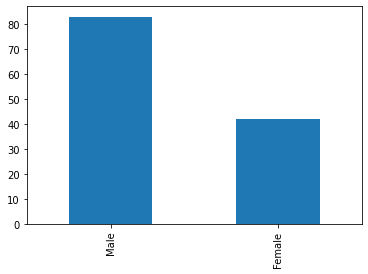

In [27]:
df_characters['Gender'].value_counts().plot.bar()

<AxesSubplot:>

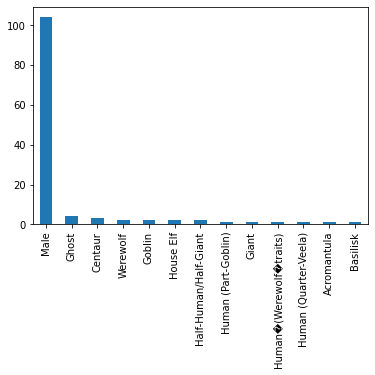

In [28]:
df_characters['Species'].value_counts().plot.bar()